<a href="https://colab.research.google.com/github/guofeng201507/AiLearning/blob/master/GUOFENG_CA1_Log_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import pandas as pd

pd.set_option('display.max_columns', 500)

df = pd.read_csv(r'/content/application_train.csv')
df.head(10)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

Feature engineering has a greater return on investment than model building and hyperparameter tuning. 

In [23]:
null_columns = df.columns[df.isnull().any()]
print(df[null_columns].isnull().sum())


AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
OWN_CAR_AGE                     202929
OCCUPATION_TYPE                  96391
CNT_FAM_MEMBERS                      2
EXT_SOURCE_1                    173378
EXT_SOURCE_2                       660
EXT_SOURCE_3                     60965
APARTMENTS_AVG                  156061
BASEMENTAREA_AVG                179943
YEARS_BEGINEXPLUATATION_AVG     150007
YEARS_BUILD_AVG                 204488
COMMONAREA_AVG                  214865
ELEVATORS_AVG                   163891
ENTRANCES_AVG                   154828
FLOORSMAX_AVG                   153020
FLOORSMIN_AVG                   208642
LANDAREA_AVG                    182590
LIVINGAPARTMENTS_AVG            210199
LIVINGAREA_AVG                  154350
NONLIVINGAPARTMENTS_AVG         213514
NONLIVINGAREA_AVG               169682
APARTMENTS_MODE                 156061
BASEMENTAREA_MODE               179943
YEARS_BEGINEXPLUATATION_M

In [24]:
df.dropna(thresh=len(df) * 0.7, axis=1, inplace=True)
print(df.shape)


(307511, 72)


In [25]:
df.dtypes.value_counts()

# Number of unique classes in each object column
df.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
dtype: int64

In [26]:
df.drop(['SK_ID_CURR'], axis=1, inplace=True)
df.shape

(307511, 71)

In [29]:
null_columns = df.columns[df.isnull().any()]
print(df[null_columns].isnull().sum())

AMT_ANNUITY                      12
AMT_GOODS_PRICE                 278
NAME_TYPE_SUITE                1292
CNT_FAM_MEMBERS                   2
EXT_SOURCE_2                    660
EXT_SOURCE_3                  60965
OBS_30_CNT_SOCIAL_CIRCLE       1021
DEF_30_CNT_SOCIAL_CIRCLE       1021
OBS_60_CNT_SOCIAL_CIRCLE       1021
DEF_60_CNT_SOCIAL_CIRCLE       1021
DAYS_LAST_PHONE_CHANGE            1
AMT_REQ_CREDIT_BUREAU_HOUR    41519
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
dtype: int64


In [28]:
df.dtypes.value_counts()

# Number of unique classes in each object column
df.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
dtype: int64

Label Encoding for column with 2 or less values

In [35]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le_count = 0

# Iterate through the columns
for col in df:
    if df[col].dtype == 'object':

        if len(list(df[col].unique())) <= 2:
            le.fit(df[col])
            df[col] = le.transform(df[col])

            le_count += 1
            
print('%d columns were label encoded.' % le_count)


3 columns were label encoded.


In [36]:
df['NAME_CONTRACT_TYPE'].unique()

array([0, 1])

One -hot encoding for categorical data

In [37]:
df = pd.get_dummies(df)
df.shape

(307511, 163)

In [38]:
df.columns

Index(['TARGET', 'NAME_CONTRACT_TYPE', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE',
       ...
       'ORGANIZATION_TYPE_Trade: type 4', 'ORGANIZATION_TYPE_Trade: type 5',
       'ORGANIZATION_TYPE_Trade: type 6', 'ORGANIZATION_TYPE_Trade: type 7',
       'ORGANIZATION_TYPE_Transport: type 1',
       'ORGANIZATION_TYPE_Transport: type 2',
       'ORGANIZATION_TYPE_Transport: type 3',
       'ORGANIZATION_TYPE_Transport: type 4', 'ORGANIZATION_TYPE_University',
       'ORGANIZATION_TYPE_XNA'],
      dtype='object', length=163)

Drop irrelevant columns

Fill missing value

In [39]:
null_columns = df.columns[df.isnull().any()]
for null_column in null_columns:
    df[null_column] = df[null_column].fillna(df[null_column].mean())

null_columns = df.columns[df.isnull().any()]
print(df[null_columns].isnull().sum())


Series([], dtype: float64)


In [0]:
df.to_csv('afterOHE.csv', index=False)

In [41]:
df.columns

Index(['TARGET', 'NAME_CONTRACT_TYPE', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE',
       ...
       'ORGANIZATION_TYPE_Trade: type 4', 'ORGANIZATION_TYPE_Trade: type 5',
       'ORGANIZATION_TYPE_Trade: type 6', 'ORGANIZATION_TYPE_Trade: type 7',
       'ORGANIZATION_TYPE_Transport: type 1',
       'ORGANIZATION_TYPE_Transport: type 2',
       'ORGANIZATION_TYPE_Transport: type 3',
       'ORGANIZATION_TYPE_Transport: type 4', 'ORGANIZATION_TYPE_University',
       'ORGANIZATION_TYPE_XNA'],
      dtype='object', length=163)

log transform

In [0]:
import numpy as np
df['AMT_INCOME_TOTAL_LOG'] = np.log(df['AMT_INCOME_TOTAL'])
df['AMT_CREDIT_LOG'] = np.log(df['AMT_CREDIT'])
df['AMT_ANNUITY_LOG'] = np.log(df['AMT_ANNUITY'])
df['AMT_GOODS_PRICE_LOG'] = np.log(df['AMT_GOODS_PRICE'])
df.drop(['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE'], axis=1,inplace = True)


In [0]:
df['YEARS_BIRTH_LOG'] = np.log(df['DAYS_BIRTH'].abs()/365)
df.loc[df.DAYS_EMPLOYED >= 0, 'DAYS_EMPLOYED'] = np.NaN 
df['DAYS_EMPLOYED'] = df['DAYS_EMPLOYED'].fillna(df['DAYS_EMPLOYED'].mean())
df['YEARS_EMPLOYED_LOG'] = np.log(df['DAYS_EMPLOYED'].abs()/365)

df.loc[df.DAYS_REGISTRATION >= 0, 'DAYS_REGISTRATION'] = np.NaN 
df['DAYS_REGISTRATION'] = df['DAYS_REGISTRATION'].fillna(df['DAYS_REGISTRATION'].mean())
df['YEARS_REGISTRATION_LOG'] = np.log(df['DAYS_REGISTRATION'].abs()/365)

df.loc[df.DAYS_ID_PUBLISH >= 0, 'DAYS_ID_PUBLISH'] = np.NaN 
df['DAYS_ID_PUBLISH'] = df['DAYS_ID_PUBLISH'].fillna(df['DAYS_ID_PUBLISH'].mean())
df['YEARS_ID_PUBLISH_LOG'] = np.log(df['DAYS_ID_PUBLISH'].abs()/365)

df.loc[df.DAYS_LAST_PHONE_CHANGE >= 0, 'DAYS_LAST_PHONE_CHANGE'] = np.NaN 
df['DAYS_LAST_PHONE_CHANGE'] = df['DAYS_LAST_PHONE_CHANGE'].fillna(df['DAYS_LAST_PHONE_CHANGE'].mean())
df['YEARS_LAST_PHONE_CHANGE_LOG'] = np.log(df['DAYS_LAST_PHONE_CHANGE'].abs()/365)

df.drop(['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE'], axis=1,inplace = True)

In [44]:
df.shape
print(df['YEARS_EMPLOYED_LOG'])

0         0.556872
1         1.180129
2        -0.483797
3         2.119386
4         2.119057
5         1.470333
6         2.148891
7         0.207126
8         1.876717
9         1.710460
10        0.620724
11        1.876717
12        2.007386
13        2.115760
14       -0.586691
15        1.153688
16        1.283214
17       -0.647624
18        3.062494
19        1.719827
20        2.463212
21        1.509845
22        2.467867
23        1.876717
24        0.714828
25        2.258905
26        1.974081
27        1.218119
28        1.593420
29        1.017808
            ...   
307481    2.154308
307482   -0.479362
307483    1.876717
307484   -0.106884
307485    0.607380
307486    1.177601
307487    1.876717
307488    1.205068
307489   -0.243906
307490    1.664341
307491    1.677225
307492    1.489049
307493    1.843372
307494    2.890828
307495    3.014460
307496    1.786265
307497    1.208347
307498    2.313213
307499    3.170491
307500    2.680458
307501    1.052831
307502    3.

In [0]:
# from sklearn.preprocessing import Imputer
# from sklearn.preprocessing import StandardScaler

# values = df.values

# data_std = StandardScaler().fit_transform(df)

In [49]:
# from sklearn.decomposition import PCA

# features = list(df)
# colnames = np.transpose(features)

# n_components = len(features)
# pca = PCA(n_components).fit(data_std)

# # generate PC labels:
# PCs=[]
# for l in range(1,n_components+1):
#     PCs.append("PC"+str(l))
    
# # Get Eigenvectors & Eigenvalues
# eigvec = pca.components_.transpose()
# eigval = pca.explained_variance_

# # Calculate Loadings = Eigenvector * SQRT(Eigenvalue)
# # print('Loading Matrix:')
# loadings= np.sqrt(eigval)*eigvec
# # print(pd.DataFrame(loadings,columns=PCs,index=colnames),'\n')

# print('\nEigenvectors (Linear Coefficients):')
# print(pd.DataFrame(eigvec,columns=PCs,index=colnames),'\n')

# var_expln= pca.explained_variance_ratio_ * 100
# eigval = -np.sort(-eigval) #descending
# npc = 60 # display-1
# print("Eigenvalues   :",eigval[0:npc])
# print("%Explained_Var:",var_expln[0:npc])
# print("%Cumulative   :",np.cumsum(var_expln[0:npc]))
# print('\n')


Eigenvectors (Linear Coefficients):
                                            PC1       PC2       PC3       PC4  \
TARGET                                -0.029380  0.069394  0.007999  0.045315   
NAME_CONTRACT_TYPE                    -0.006319  0.095571 -0.155453  0.021982   
FLAG_OWN_CAR                          -0.122934 -0.086968  0.044192  0.216156   
FLAG_OWN_REALTY                        0.055233 -0.011735  0.067351  0.016673   
CNT_CHILDREN                          -0.145410  0.056131  0.186596  0.042922   
REGION_POPULATION_RELATIVE            -0.027383 -0.219951 -0.165675 -0.043379   
FLAG_MOBIL                             0.000882 -0.000307  0.001527 -0.001542   
FLAG_EMP_PHONE                        -0.367537  0.092998  0.035057 -0.153801   
FLAG_WORK_PHONE                       -0.104589  0.069656 -0.008467 -0.043120   
FLAG_CONT_MOBILE                       0.007162 -0.004070  0.030227  0.001859   
FLAG_PHONE                             0.004887 -0.049856 -0.029067 -0.0

Split data

In [50]:
y = df['TARGET']
X = df.drop('TARGET', axis=1)

from sklearn.model_selection import train_test_split, cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1 / 4, random_state=42)
# if stratify as true, train set is (7164, 48), test set is (5379, 48)

print(X_train.shape)

print(X_test.shape)                                                                                                         


(230633, 162)
(76878, 162)


In [0]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [52]:
# Log Regression -----------------------------------------------------------------------------
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(C=6).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Training set score: 0.919
Test set score: 0.919


In [53]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = logreg.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[70598    89]
 [ 6111    80]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     70687
           1       0.47      0.01      0.03      6191

    accuracy                           0.92     76878
   macro avg       0.70      0.51      0.49     76878
weighted avg       0.88      0.92      0.88     76878



Accuracy= 0.9193527407060538


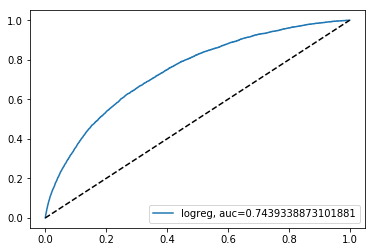

In [54]:
# ROC
from sklearn import metrics
import matplotlib.pyplot as plt

print("Accuracy=", metrics.accuracy_score(y_test, y_pred))

y_pred_proba = logreg.predict_proba(X_test)[::, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr, tpr, label="logreg, auc=" + str(auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.legend(loc=4)
plt.show()

In [0]:
# Naiive Bayes -------------------------------------------------------------------------------
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

# Initiating the Gaussian Classifier
mod = GaussianNB()

# Training your model
mod.fit(X_train, y_train)

print("Training set score: {:.3f}".format(mod.score(X_train, y_train)))
print("Test set score: {:.3f}".format(mod.score(X_test, y_test)))

In [0]:
# Predicting Outcome
predicted = mod.predict(X_test)

mod.score(X_test, y_test)

# Confusion Matrix
y_pred = mod.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Naive Bayes performs well when we have multiple classes and working with text classification. Advantage of Naive Bayes algorithms are:
#
# It is simple and if the conditional independence assumption actually holds, a Naive Bayes classifier will converge quicker than discriminative models like logistic regression, so you need less training data. And even if the NB assumption doesn’t hold.
# It requires less model training time
# The main difference between Naive Bayes(NB) and Random Forest (RF) are their model size. Naive Bayes model size is low and quite constant with respect to the data. The NB models cannot represent complex behavior so it won’t get into over fitting. On the other hand, Random Forest model size is very large and if not carefully built, it results to over fitting. So, When your data is dynamic and keeps changing. NB can adapt quickly to the changes and new data while using a RF you would have to rebuild the forest every time something changes.

# !!!!!!!!!!!!!!!!!!!!!!!random forest is better than log regression , gradient boosting better than random forest


In [0]:
# random forest
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0)
clf.fit(X_train, y_train)

print("Training set score: {:.3f}".format(clf.score(X_train, y_train)))
print("Test set score: {:.3f}".format(clf.score(X_test, y_test)))

In [0]:
# ROC
from sklearn import metrics
import matplotlib.pyplot as plt

print("Accuracy=", metrics.accuracy_score(y_test, y_pred))

y_pred_proba = clf.predict_proba(X_test)[::, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr, tpr, label="random forest, auc=" + str(auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.legend(loc=4)
plt.show()

In [0]:
# GradientBoostingClassifier

from sklearn.ensemble import GradientBoostingRegressor

params = {
    'n_estimators': 1,
    'max_depth': 5,
    'learning_rate': 1,
    'criterion': 'mse'
}

gbr = GradientBoostingRegressor(**params)
gbr.fit(X_train, y_train)

print("Training set score: {:.3f}".format(clf.score(X_train, y_train)))
print("Test set score: {:.3f}".format(clf.score(X_test, y_test)))

In [0]:
# Neural network

from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(30, 30, 30))
mlp.fit(X_train, y_train)

print("Training set score: {:.3f}".format(mlp.score(X_train, y_train)))
print("Test set score: {:.3f}".format(mlp.score(X_test, y_test)))

In [0]:
#cross validation score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from sklearn.pipeline import make_pipeline
logreg = make_pipeline(StandardScaler(), LogisticRegression(C=6))
print(cross_val_score(logreg, X, y, cv=10))